### 텐서보드 실행 및 metric 확인후 csv 파일로 저장

- cmd 에서
    ```bash
    tensorboard --logdir=models/gpt2/gpt2_base_0/logs --port=9999 
    tensorboard --logdir=models/gpt2/gpt2_base_1/logs --port=9999 
    tensorboard --logdir=models/gpt2/kogpt2_0/logs --port=9999 
    tensorboard --logdir=models/gpt2/kogpt2_1/logs --port=9999
    tensorboard --logdir=models/gpt2/kogpt2_2/logs --port=9999 
    ```

In [1]:
# 기본 작업 경로 설정

import os
notebook_path = os.path.abspath("../readme.md")
notebook_dir = os.path.dirname(notebook_path)
os.chdir(notebook_dir)

# 현재 작업 디렉토리 출력
print("Current working directory: ", os.getcwd())

Current working directory:  /mnt/e/py_data/project_3_git


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [14]:
import pandas as pd

gpt2_base_0 = pd.read_csv('models/gpt2/gpt2_base_0.csv')
gpt2_base_1 = pd.read_csv('models/gpt2/gpt2_base_1.csv')
kogpt2_0 = pd.read_csv('models/gpt2/kogpt2_0.csv')
kogpt2_1 = pd.read_csv('models/gpt2/kogpt2_1.csv')
kogpt2_2 = pd.read_csv('models/gpt2/kogpt2_2.csv')

gpt2_base_0['epoch'] = gpt2_base_0['Step'] / (6000 / 16)
gpt2_base_1['epoch'] = gpt2_base_1['Step'] / (6000 / 16)
kogpt2_0['epoch'] = kogpt2_0['Step'] / (6000 / 10)
kogpt2_1['epoch'] = kogpt2_1['Step'] / (6000 / 16)
kogpt2_2['epoch'] = kogpt2_2['Step'] / (6000 / 16)

In [15]:
metrics_list=[]
metrics_list.append(kogpt2_0)
metrics_list.append(kogpt2_1)
metrics_list.append(kogpt2_2)
metrics_list.append(gpt2_base_0)
metrics_list.append(gpt2_base_1)


metrics_names=[]
metrics_names.append('kogpt2_0')
metrics_names.append('kogpt2_1')
metrics_names.append('kogpt2_2')
metrics_names.append('gpt2_base_0')
metrics_names.append('gpt2_base_1')

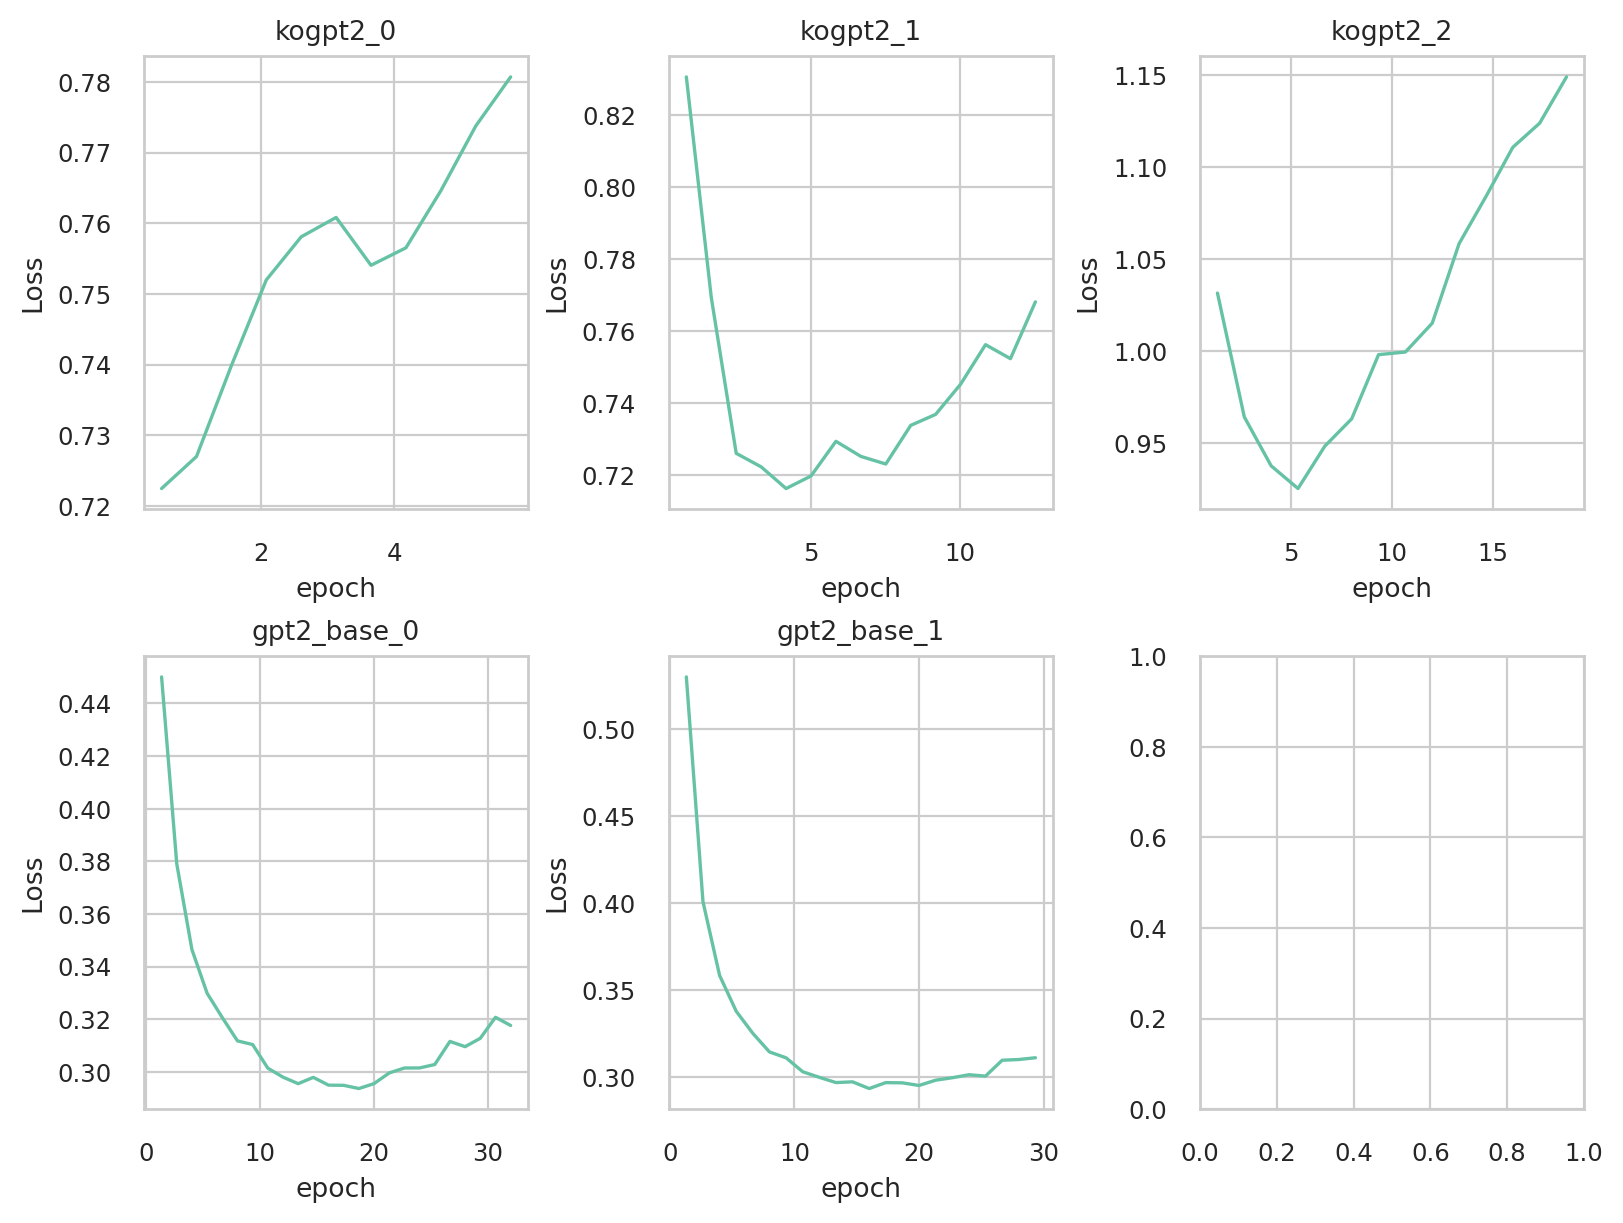

In [16]:
fig, ax = plt.subplots(2,3,figsize = (8,6))
ax = ax.flatten()

for i, m, n in zip(ax,metrics_list, metrics_names):
    sns.lineplot(data=m,
                x='epoch',
                y='Value',
                ax=i)
    i.set_title(n)
    i.set_ylabel('Loss')

In [6]:
fig.savefig('models/gpt2/val_loss_comparison.png', dpi=300)

In [7]:
gpt2_base_0.loc[gpt2_base_0['Value'] == gpt2_base_0['Value'].min()][['Step', 'Value']]

,Step,Value
13,7000,0.293683


In [8]:
print(f'''
{metrics_names[0]}
{gpt2_base_0.loc[gpt2_base_0['Value'] == gpt2_base_0['Value'].min()][['Step', 'Value']]}

{metrics_names[1]}
{gpt2_base_1.loc[gpt2_base_1['Value'] == gpt2_base_1['Value'].min()][['Step', 'Value']]}

{metrics_names[2]}
{kogpt2_0.loc[kogpt2_0['Value'] == kogpt2_0['Value'].min()][['Step', 'Value']]}

{metrics_names[3]}
{kogpt2_1.loc[kogpt2_1['Value'] == kogpt2_1['Value'].min()][['Step', 'Value']]}

{metrics_names[4]}
{kogpt2_2.loc[kogpt2_2['Value'] == kogpt2_2['Value'].min()][['Step', 'Value']]}
''')


kogpt2_0
    Step     Value
13  7000  0.293683

kogpt2_1
    Step     Value
11  6000  0.293336

kogpt2_2
   Step    Value
0   313  0.72245

gpt2_base_0
   Step     Value
4  1565  0.716322

gpt2_base_1
   Step     Value
3  2000  0.925404

